<a href="https://colab.research.google.com/github/JOSHITHA6/Weather_Forecast/blob/main/ML_SEM6_PROJ_JOSH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

       Date/Time  Temp_C  Dew Point Temp_C  Rel Hum_%  Wind Speed_km/h  \
0  1/1/2012 0:00    -1.8              -3.9         86                4   
1  1/1/2012 1:00    -1.8              -3.7         87                4   
2  1/1/2012 2:00    -1.8              -3.4         89                7   
3  1/1/2012 3:00    -1.5              -3.2         88                6   
4  1/1/2012 4:00    -1.5              -3.3         88                7   

   Visibility_km  Press_kPa               Weather  
0            8.0     101.24                   Fog  
1            8.0     101.24                   Fog  
2            4.0     101.26  Freezing Drizzle,Fog  
3            4.0     101.27  Freezing Drizzle,Fog  
4            4.8     101.23                   Fog  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   obje

<ipython-input-1-c09c4e757312>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)


Lasso Regression Performance:
Mean Squared Error: 119.16
Mean Absolute Error: 9.20
R-squared: 0.18

Decision Tree Regression Performance:
Mean Squared Error: 193.96
Mean Absolute Error: 10.02
R-squared: -0.34

Random Forest Regression Performance:
Mean Squared Error: 108.04
Mean Absolute Error: 7.99
R-squared: 0.25



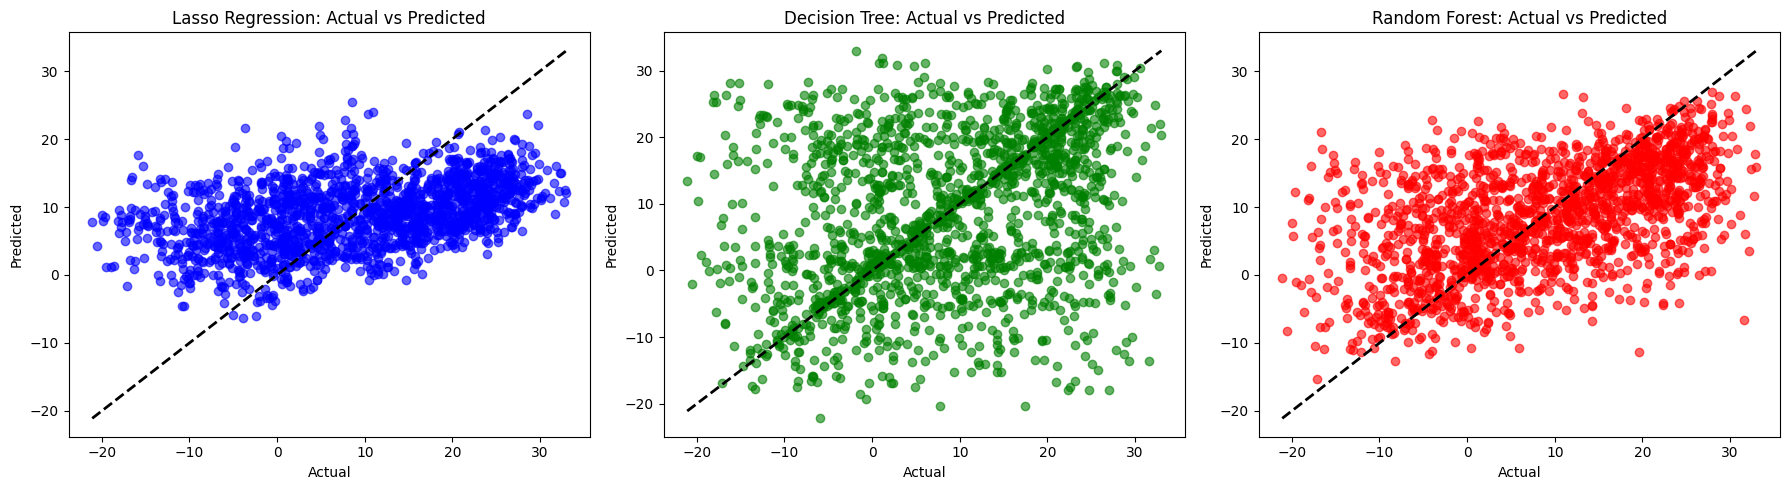

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import requests  # For downloading the dataset programmatically
import io       # To handle in-memory data

# Download the dataset from GitHub
url = "https://raw.githubusercontent.com/JOSHITHA6/Weather_Forecast/main/Project1WeatherDataset.csv"
response = requests.get(url)
if response.status_code == 200:
    data = pd.read_csv(io.StringIO(response.text))
else:
    print("Error: Unable to fetch the dataset. Please check the URL.")
    exit()

# Inspecting the data
print(data.head())
print(data.info())

# Preprocessing: Selecting relevant features and handling missing values
data = data[['Temp_C', 'Rel Hum_%', 'Wind Speed_km/h', 'Press_kPa']]
data.dropna(inplace=True)

# Defining features and target
X = data.drop('Temp_C', axis=1)
y = data['Temp_C']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Helper function to evaluate model performance
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{model_name} Performance:")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"Mean Absolute Error: {mae:.2f}")
    print(f"R-squared: {r2:.2f}\n")
    return y_pred

# 1. Lasso Regression
lasso = Lasso(alpha=0.1, random_state=42)
lasso.fit(X_train, y_train)
y_pred_lasso = evaluate_model(lasso, X_test, y_test, "Lasso Regression")

# 2. Decision Tree Regression
decision_tree = DecisionTreeRegressor(random_state=42)
decision_tree.fit(X_train, y_train)
y_pred_tree = evaluate_model(decision_tree, X_test, y_test, "Decision Tree Regression")

# 3. Random Forest Regression
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)
y_pred_forest = evaluate_model(random_forest, X_test, y_test, "Random Forest Regression")

# Plotting actual vs predicted for each model
plt.figure(figsize=(18, 5))

# Lasso Regression
plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred_lasso, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Lasso Regression: Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')

# Decision Tree Regression
plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred_tree, alpha=0.6, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Decision Tree: Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')

# Random Forest Regression
plt.subplot(1, 3, 3)
plt.scatter(y_test, y_pred_forest, alpha=0.6, color='red')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Random Forest: Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.tight_layout()
plt.show()
